# Data loading and process

In [8]:
import pandas as pd


# data path
file_path = '../data/cumulative_2022_v3_9_domain.csv'

data = pd.read_csv(file_path)



In [9]:
# check the "Year" column's max and min value
print(data['Year'].max())
print(data['Year'].min())

2020.0
1948.0


In [11]:
data.isnull().sum()

Year                                  0
South                              1801
region                             1801
racial_composition_nbhood         59420
racial_composition_gradeSchool    60327
                                  ...  
occupation                        28223
occupation14                      51795
occupation71                      51795
home_ownership                    13672
urbanism                          24972
Length: 116, dtype: int64

In [13]:
# analysis the missing value of each column in differernt period:
# 1. overall missing value and percentage
# 2. missing value and percentage in recent 10 years ("Year" >= 2012)")
# 3. missing value and percentage in recent 20 years ("Year" >= 2002)")
# 4. missing value and percentage in recent 30 years ("Year" >= 1992)")
# 5. missing value and percentage in recent 40 years ("Year" >= 1982)")
# 6. missing value and percentage in recent 50 years ("Year" >= 1972)")
# 7. missing value and percentage in recent 60 years ("Year" >= 1962)")

# save the result in csv file, the first column is the feature name


def missing_value_analysis(data):
    # get the number of missing value of each column
    missing_value_num = data.isnull().sum()
    # get the percentage of missing value of each column
    missing_value_percentage = missing_value_num / len(data)

    missing_value_percentage_10 = data[data['Year'] >= 2012].isnull().sum() / len(data[data['Year'] >= 2012])
    missing_value_percentage_20 = data[data['Year'] >= 2002].isnull().sum() / len(data[data['Year'] >= 2002])
    missing_value_percentage_30 = data[data['Year'] >= 1992].isnull().sum() / len(data[data['Year'] >= 1992])
    missing_value_percentage_40 = data[data['Year'] >= 1982].isnull().sum() / len(data[data['Year'] >= 1982])
    missing_value_percentage_50 = data[data['Year'] >= 1972].isnull().sum() / len(data[data['Year'] >= 1972])
    missing_value_percentage_60 = data[data['Year'] >= 1962].isnull().sum() / len(data[data['Year'] >= 1962])
    missing_value_percentage_70 = data[data['Year'] >= 1952].isnull().sum() / len(data[data['Year'] >= 1952])

    # combine the result
    missing_value = pd.concat([missing_value_num, missing_value_percentage,
                               missing_value_percentage_10, missing_value_percentage_20,
                               missing_value_percentage_30, missing_value_percentage_40,
                               missing_value_percentage_50, missing_value_percentage_60,    missing_value_percentage_70], axis=1)
    missing_value.columns = ['missing_value_num', 'missing_value_percentage',
                                'missing_value_percentage_10(>=2012)', 'missing_value_percentage_20(>=2002)',
                                'missing_value_percentage_30(>=1992)', 'missing_value_percentage_40(>=1982)',
                                'missing_value_percentage_50(>=1972)', 'missing_value_percentage_60(>=1962)', 'missing_value_percentage_60(>=1952)']

    # sort the result by missing value percentage
    missing_value = missing_value.sort_values(by='missing_value_percentage', ascending=False)


    return missing_value

massing_value = missing_value_analysis(data)

# save the result
massing_value.to_csv('../data/missing_value_analysis.csv')


In [6]:
# check the shape of the DataFrame
print( df.shape)
print( 'there are', df.shape[0], 'samples(rows) and', df.shape[1], 'variables(columns) in the DataFrame\n\n')

# check the head sample of the DataFrame
# print(df.head())

# save the DataFrame as a csv file
# df.to_csv('../data/cumulative_2022_v3_9.csv', index=False)


(68224, 1030)
there are 68224 samples(rows) and 1030 variables(columns) in the DataFrame




In [4]:


variable_labels = meta.column_labels

variable_to_column_dict = {}

# we also build a dictionary to map the variable labels in meta to column names in df, which may make the feature indexing more conveniently

for i in range(len(variable_labels)):

    variable_to_column_dict[variable_labels[i]] = df.columns[i]

# we further check the meaning(label) of the values for each variable

value_labels = meta.variable_value_labels

In [27]:
# add a dict to store the features for each domain

domain_features = {}

domain_features['Contextual_Domain'] = [
                                        'South',
                                        'region',
                                        'racial_composition_nbhood',
                                        'racial_composition_gradeSchool',
                                        'racial_composition_juniorHigh',
                                        'racial_composition_highSchool', 
                                        'racial_composition_shops',
                                        'racial_composition_friends',
                                        'length_residence_home',
                                        'length_residence_community',
                                        'workedWithcommunity',
                                        'volunteer',
                                        'meetingCommuntySchool',
                                        'living_withFamily',
                                        'Age',
                                        'Gender',
                                        'Race3',
                                        'Race4',
                                        'Race7',
                                        'Education4',
                                        'education6',
                                        'education7',
                                        'church_attendance',
                                        'VCF0130',
                                        'VCF0131',
                                        
]

domain_features['Identity_Domain'] = [
                                        'sex_orientation',
                                        'bisexalFamilyorFriends',
                                        'have_healthInsurance',
                                        'satisfactionLife',
                                        'bornAgain',
                                        'howOftenTrust',
                                        'trustPeople',
                                        'VCF0626',
                                        'VCF0627',
                                        'VCF0628',
                                        'VCF0629',
                                        'concern_war',
                                        'concern_nuclear_war',


]
    

domain_features['Presidential_Politics_Domain'] = [
                                      'approve_pres',
                                      'approve_pres_strength',
                                      'Presidency_performance',
                                      'vote_always_sameParty',
                                      'Will_PresElectionClose',
                                      'approve_president_economy',
                                      'party_handle_problem',
                                      'VCF9219',
                                      'VCF9220',
]

domain_features['affect_domain'] = [
                                'therm_Blacks',
                                'therm_Whites',
                                'therm_hispanics',
                                'therm_Asians',
                                'therm_Protestants',
                                'therm_Catholics',
                                'therm_Jews',
                                'therm_Christians',
                                'therm_ChrFundament',
                                'therm_Mislims',
                                'thermometer_evangelical',
                                'thermometer_women',
                                'therm_liberals',
                                'therm_conservatives',
                                'VCF0886',
                                'VCF0887',
                                'VCF0890',
                                'VCF0891',
                    
]

domain_features['Cognitive domain'] = [
    'ideology7',
    'authoritarian1',
    'authoritarian2',
    'authoritarian3',
    'authoritarian4',
    'votingMakedifference',
    'understand_poliIssues',
    'politics2complicated',
    'powerDifference',
    'satisfactionDemocracy',
    'follow_political_info',
    'blackInfluence_Politics',
    'media_type_count',
]


domain_features['Electoral_Engagement_domain'] =[
'Vote_Nonvote_Pres',
'Pre_election_inten_vote',
'intend_v_actual_presVote',
'Voted_Congress',
'Voted_Senate',
'VCF9027',
'VCF9028',
'VCF9029',
'VCF9030',
'VCF9030a',
'VCF9030b',
'VCF9030c',
'VCF9031',
'VCF9022',
'VCF9023',    
'Registered',
'Voted',
'Registered_voted',
'VCF0717',
'VCF0718',
'VCF0719',
'VCF0720',
'VCF0721',
]

domain_features['Political_Inclinations_Domain'] = \
[
    'Party_id3',
    'Party_id7',
    'Interest_elections',
    'interest_pubAffair',
    'therm_DemParty',
    'therm_RepParty',
    'Voted_party',
    'Voted_D_R',
]

domain_features['Socio_Eco_Domain'] = [
    'Family_income',
    'occupation',
    'occupation14',
    'occupation71',
    'home_ownership',
    'urbanism',
]


# check the variable labels for each domain is in the df.columns

for domain in domain_features.keys():
    for feature in domain_features[domain]:
        if feature not in df.columns:
            print(feature, 'is not in the df.columns')

            
# number of the total domain_features
print('there are', sum([len(domain_features[domain]) for domain in domain_features.keys()]), 'domain_features in total\n\n')

all_domain_features = []
for domain in domain_features.keys():
    all_domain_features += domain_features[domain]
    



there are 115 domain_features in total




In [29]:
df_domain = df[all_domain_features]

# save the DataFrame as a csv file
df_domain.to_csv('../data/cumulative_2022_v3_9_domain.csv', index=False)



In [5]:
# other information in meta

num_rows = meta.number_rows
num_cols = meta.number_columns
file_label = meta.file_label

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(f"File label: {file_label}\n")

# check the missing values in the DataFrame
print('number of missing values of each variable: ')
print(df.isnull().sum())


Number of rows: 68224
Number of columns: 1030
File label: None

number of missing values of each variable: 
Version                       0
Year                          0
VCF0006                       0
VCF0006a                      0
VCF0009x                   8280
                          ...  
VCF9278                   52338
sex_orientation           47942
bisexalFamilyorFriends    48900
have_healthInsurance      42284
living_withFamily         47503
Length: 1030, dtype: int64


# Model 1: regression

In [70]:
# we try a simple multi-variates regression model 

# for example, we use the "number_children", "Age_group " and "Family_income" to predict "level_politicalInfo_Post"

used_variable = ['number_children', 'Age_group', 'Family_income']
target = 'level_politicalInfo_Post'

#  check the value labels of the used variables and target variable
for var in used_variable:
    print(var, value_labels[var],'\n')
print(target, value_labels[target])


number_children {0.0: '0. None', 1.0: '1. One', 2.0: '2. Two', 3.0: '3. Three', 4.0: '4. Four', 5.0: '5. Five', 6.0: '6. Six', 7.0: '7. Seven', 8.0: '8. Eight or more', 9.0: '9. NA; no Pre IW; Panel (1992,1996,2002)'} 

Age_group {0.0: '0. NA; DK; RF; no Pre IW', 1.0: '1. 17 - 24', 2.0: '2. 25 - 34', 3.0: '3. 35 - 44', 4.0: '4. 45 - 54', 5.0: '5. 55 - 64', 6.0: '6. 65 - 74', 7.0: '7. 75 - 99 and over (except 1954)'} 

Family_income {0.0: '0. DK; NA; refused to answer; no Pre IW', 1.0: '1. 0 to 16 percentile', 2.0: '2. 17 to 33 percentile', 3.0: '3. 34 to 67 percentile', 4.0: '4. 68 to 95 percentile', 5.0: '5. 96 to 100 percentile'} 

level_politicalInfo_Post {0.0: '0. no Post IW; abbrev. Post IW (1984); web  mode (2012,2016)', 1.0: '1. Very high', 2.0: '2. Fairly high', 3.0: '3. Average', 4.0: '4. Fairly low', 5.0: '5. Very low', 9.0: '9. NA'}


In [72]:
# based on the value labels, we only keep the samples with valid values for the used variables and target variable

# remove the missing values
df_used = df[used_variable + [target]].dropna()

# remove the samples with invalid values for the used variables and target variable

# remove the samples whose 'number_children' is 9.0
df_used = df_used[df_used['number_children'] != 9.0]

# remove the samples whose 'Age_group' is 0.0
df_used = df_used[df_used['Age_group'] != 0.0]

# remove the samples whose 'Family_income' is 0.0
df_used = df_used[df_used['Family_income'] != 0.0]

# remove the samples whose 'level_politicalInfo_Post' is 0.0
df_used = df_used[df_used['level_politicalInfo_Post'] != 0.0]


print(df_used.shape)

# the summary of the used variables
print(df_used.describe())

(14598, 4)
       number_children     Age_group  Family_income  level_politicalInfo_Post
count     14598.000000  14598.000000   14598.000000              14598.000000
mean          0.812303      3.459378       2.899986                  3.007261
std           1.070755      1.733047       1.156044                  1.092152
min           0.000000      1.000000       1.000000                  1.000000
25%           0.000000      2.000000       2.000000                  2.000000
50%           0.000000      3.000000       3.000000                  3.000000
75%           2.000000      5.000000       4.000000                  4.000000
max           3.000000      7.000000       5.000000                  5.000000


In [73]:
# we use the sklearn package to build the regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# split the data into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(df_used[used_variable], df_used[target], test_size=0.2, random_state=42)

# build the model
reg = LinearRegression().fit(X_train, y_train)

# make predictions
y_pred = reg.predict(X_test)

# check the performance of the model
print('Coefficients: \n', reg.coef_)

print('Mean squared error: %.2f'    
        % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))



Coefficients: 
 [ 0.10196896 -0.04577132 -0.32319057]
Mean squared error: 1.08
Coefficient of determination: 0.13


# Model 2: classification

In [81]:
# we try a simple classification model

# for example, we use the "number_children", "Age_group " and "Family_income" to predict "VCF0302"-- Party Identification of Respondent- Initial Party ID Response

used_variable = ['number_children', 'Age_group', 'Family_income']
target = 'VCF0302'


for var in used_variable:
    print(var, value_labels[var],'\n')
#  check the value lables of the target variable
print(target , value_labels[target])


number_children {0.0: '0. None', 1.0: '1. One', 2.0: '2. Two', 3.0: '3. Three', 4.0: '4. Four', 5.0: '5. Five', 6.0: '6. Six', 7.0: '7. Seven', 8.0: '8. Eight or more', 9.0: '9. NA; no Pre IW; Panel (1992,1996,2002)'} 

Age_group {0.0: '0. NA; DK; RF; no Pre IW', 1.0: '1. 17 - 24', 2.0: '2. 25 - 34', 3.0: '3. 35 - 44', 4.0: '4. 45 - 54', 5.0: '5. 55 - 64', 6.0: '6. 65 - 74', 7.0: '7. 75 - 99 and over (except 1954)'} 

Family_income {0.0: '0. DK; NA; refused to answer; no Pre IW', 1.0: '1. 0 to 16 percentile', 2.0: '2. 17 to 33 percentile', 3.0: '3. 34 to 67 percentile', 4.0: '4. 68 to 95 percentile', 5.0: '5. 96 to 100 percentile'} 

VCF0302 {1.0: '1. Republican', 2.0: '2. Independent', 3.0: '3. No preference; none; neither', 4.0: '4. Other', 5.0: '5. Democrat', 8.0: '8. DK', 9.0: '9. NA; refused'}


In [82]:
# we first drop samples with missing values,

df_used = df[used_variable + [target]].dropna()

# remove the samples with invalid values for the used variables and target variable

# remove the samples whose 'number_children' is 9.0
df_used = df_used[df_used['number_children'] != 9.0]

# remove the samples whose 'Age_group' is 0.0
df_used = df_used[df_used['Age_group'] != 0.0]

# remove the samples whose 'Family_income' is 0.0
df_used = df_used[df_used['Family_income'] != 0.0]

#  then we only select the samples whose target value is {1.0: '1. Republican', 5.0: '5. Democrat'} (it can be a multi-class classification problem if we select more than 2 values, but here we only select 2 values to make it a binary classification problem)) 

df_used = df_used[df_used[target].isin([1.0, 5.0])]

# transform the target variable to binary values
df_used[target] = df_used[target].apply(lambda x: 1 if x == 1.0 else 0)

print(df_used.shape)

# the summary of the used variables
print(df_used.describe())

(10372, 4)
       number_children     Age_group  Family_income       VCF0302
count     10372.000000  10372.000000   10372.000000  10372.000000
mean          0.745083      3.670748       2.874566      0.386136
std           1.042256      1.765508       1.155694      0.486886
min           0.000000      1.000000       1.000000      0.000000
25%           0.000000      2.000000       2.000000      0.000000
50%           0.000000      3.000000       3.000000      0.000000
75%           1.000000      5.000000       4.000000      1.000000
max           3.000000      7.000000       5.000000      1.000000


In [83]:
# we still use the sklearn package to build the classification model by logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# use accuracy, F1 score, AUC as the performance metric
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# split the data into training and testing sets(80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(df_used[used_variable], df_used[target], test_size=0.2, random_state=42)

# build the model
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# check the performance of the model, report the accuracy
print('Coefficients: \n', clf.coef_)
print('Accuracy: %.2f'    
        % accuracy_score(y_test, y_pred))
print('F1 score: %.2f'
        % f1_score(y_test, y_pred))
print('AUC: %.2f'
        % roc_auc_score(y_test, y_pred))


Coefficients: 
 [[-0.07056391 -0.00963245  0.29203705]]
Accuracy: 0.63
F1 score: 0.15
AUC: 0.53


<Axes: >

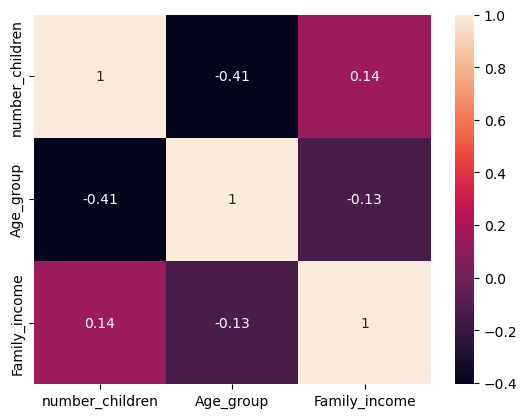

In [84]:
# at last, we check the correlation between the three variables

corr_matrix = df[['number_children', 'Age_group', 'Family_income']].corr()
# visualize the correlation matrix

# install the seaborn and matplotlib packages first if you don't have them
# !pip install seaborn
# !pip install matplotlib

import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corr_matrix, annot=True)

# Model 3: Deep Model with Pytorch

In [87]:
# we use pytorch to build a simple neural network to predict the target variable based on the used variables

# the setting is same to the classfication model above: use the "number_children", "Age_group " and "Family_income" to predict "VCF0302"-- Party Identification of Respondent- Initial Party ID Response


import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# split the data into training and testing sets(80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(df_used[used_variable], df_used[target], test_size=0.2, random_state=42)

# transform the data to torch tensor

X_train = torch.tensor(X_train.values).float()
X_test = torch.tensor(X_test.values).float()
y_train = torch.tensor(y_train.values).float()
y_test = torch.tensor(y_test.values).float()

# build the NN model, a simple fully-connected neural network with 3 hidden layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x
    
net = Net()

# define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# train the model

for epoch in range(1000):  # loop over the dataset multiple times
    
        optimizer.zero_grad()   # zero the gradient buffers
    
        outputs = net(X_train)
        loss = criterion(outputs.squeeze(), y_train)
        loss.backward()
        optimizer.step()
    
        if epoch % 100 == 0:
            print(f"Epoch {epoch} loss: {loss.item()}")
    
print('Finished Training')

# make predictions
outputs = net(X_test)
y_pred = outputs.detach().numpy()
y_pred = np.where(y_pred > 0.5, 1, 0)

# check the performance of the model, report the accuracy
print('Accuracy: %.2f'    
        % accuracy_score(y_test, y_pred))
print('F1 score: %.2f'
        % f1_score(y_test, y_pred))
print('AUC: %.2f'
        % roc_auc_score(y_test, y_pred))





Epoch 0 loss: 0.7286853194236755
Epoch 100 loss: 0.6707441806793213
Epoch 200 loss: 0.6615500450134277
Epoch 300 loss: 0.6577353477478027
Epoch 400 loss: 0.6546148657798767
Epoch 500 loss: 0.6523251533508301
Epoch 600 loss: 0.6512188911437988
Epoch 700 loss: 0.6507850885391235
Epoch 800 loss: 0.6505460143089294
Epoch 900 loss: 0.6503548622131348
Finished Training
Accuracy: 0.63
F1 score: 0.24
AUC: 0.55
